


La Ciencia de Datos y el Machine Learning han demostrado su valor en la predicción de precios en diversos sectores, y el mercado de automoviles  no es una excepción. 

En este proyecto, se aprovechará la abundante información disponible sobre vehículos usados, como características técnicas, antigüedad, kilometraje, etc., para desarrollar modelos de predicción precisos.

Además, como complemento al modelo de predicción, se creará una aplicación web utilizando Streamlit, una herramienta para la creación de interfaces interactivas con Python. Esta aplicación permitirá a los usuarios introducir los datos de un vehículo y obtener una estimación del precio en tiempo real, facilitando así la toma de decisiones de compra o venta.

Adicionalmente, se implementarán diferentes dashboards interactivos que ofrecerán visualizaciones y análisis detallados sobre el conjunto de datos de vehículos de segunda mano. Estos dashboards proporcionarán información valiosa sobre las tendencias del mercado, distribución de precios, relación entre variables, entre otros aspectos relevantes.

El desarrollo de este TFM se dividirá en distintas etapas, desde la recopilación y preparación de los datos hasta la implementación de los modelos de Machine Learning y la construcción de la interfaz web

En resumen, este TFM tiene como objetivo principal desarrollar un sistema de predicción del precio de vehículos mediante técnicas de Machine Learning, junto con una interfaz web interactiva para facilitar su uso. Además, se proporcionarán dashboards interactivos que ofrecerán una visión completa y detallada de los datos relacionados con vehículos de segunda mano. El resultado final será una herramienta útil tanto para compradores y vendedores de vehículos como para profesionales del sector del automovil en la toma de decisiones informadas y en el análisis de tendencias del mercado.







# 1. OBTENCIÓN DE DATOS Y DEPENDENCIAS

# 2. EXPLORATORY  DATA ANALYSIS (EDA)

    * 2.1 Visión general del dataset 
    * 2.2 Eliminación de columnas innecesarias
    * 2.3 Rellenar valores nulos
        - 2.3.1 Rellenar "KM" vacíos
        - 2.3.2 Rellenar "FUEL" y "SHIFT" vacíos
        - 2.3.3 Rellenar "POWER" vacíos

# 3. TRANSFORMACIÓN DE DATOS
    * 3.1 Codificación de variables categóricas
    * 3.2 Feature Engineering (antigüedad)
    * 3.3 Identificación de valores atípicos

# 4. MODELOS DE MACHINE LEARNING
    * 4.1 División de datos en entrenamiento y prueba 
    * 4.2 Prueba de modelos de ML
        - Regresión Lineal
        - Ramdon Forest Regression
        - K-Nearest Neighbors
        - Decision Tree Regression
    * 4.3 Selección del modelo




# 1.OBTENCIÓN DE DATOS Y DEPENDENCIAS

### Importamos las dependencias 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import pickle
import datetime


# Importamos algunos algoritmos de clasificación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score



### Creamos dataframe leyendo el csv

Se trata de un dataset de vehiculos de segunda mano con 100.000 registros y 28 columnas.Observo que hay demasiadas columnas y que tendré que quedarme con la que verdaderamente vayan a servir para mi modelo de predicción de precio

In [2]:
df = pd.read_csv("coches.csv",sep=",")
df.head(3)



,vehicle_type,make,model,version,fuel,year,kms,power,doors,shift,...,dealer_name,dealer_description,dealer_address,dealer_zip_code,dealer_city,dealer_country_code,dealer_is_professional,dealer_website,dealer_registered_at,date
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,NaN,manual,...,Sergio Y.,NaN,"2, Carrer de Jacint Benavente, Poblenou, Pined...",8397.0,Pineda de Mar,ES,True,www.cocheauto.com,2017-01-18,2023-02-06
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,NaN,manual,...,Peugeot Alcala 534,Concesionario Oficial Peugeot Alcalá 534. Disp...,"Avenida de José Gárate, Coslada, Área metropol...",28823.0,Coslada,ES,True,www.alcala534.com/es/vehiculos-ocasion,2019-02-15,2023-02-06
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,NaN,automatic,...,Clicars S.,Nº1 en Europa en venta de coches online. \nYa ...,"San Cristóbal, Avenida de Andalucía, San Crist...",28021.0,Madrid,ES,True,www.clicars.com/,2016-05-09,2023-02-06


In [3]:
df.shape

(100000, 28)

In [4]:
df = df.drop_duplicates()  # eliminamos los registros duplicados.


In [5]:
df.shape

(99763, 28)

# 2. EXPLORATORY  DATA ANALYSIS (EDA)

## 2.1 visión general del dataset 

In [6]:
df.describe(include="all")

,vehicle_type,make,model,version,fuel,year,kms,power,doors,shift,...,dealer_name,dealer_description,dealer_address,dealer_zip_code,dealer_city,dealer_country_code,dealer_is_professional,dealer_website,dealer_registered_at,date
count,99763,99763,99763,99605,96586,99763.000000,9.895400e+04,99480.000000,0.0,98745,...,99671,81418,99671,99671.000000,99671,99763,99763,79766,99671,99763
unique,1,66,748,8658,4,NaN,NaN,NaN,NaN,2,...,1678,1181,1675,NaN,665,1,1,888,1177,13
top,car,Citroen,C3,2.0L TD4 HSE 4x4 132 kW (180 CV),Diésel,NaN,NaN,NaN,NaN,manual,...,OCASION P.,"Para Comprar o Vender tu coche, Primero en FLE...","Colegio Privado Don Bosco Salesianos, avenida ...",NaN,Madrid,ES,True,www.flexicar.es,2019-10-31,2023-02-06
freq,99763,16495,4019,366,52983,NaN,NaN,NaN,NaN,59670,...,4445,24558,2194,NaN,5086,99763,99763,25860,5316,28276
mean,NaN,NaN,NaN,NaN,NaN,2016.257280,8.784539e+04,189.941747,NaN,NaN,...,NaN,NaN,NaN,24467.695699,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,4.607768,5.854226e+04,3233.338230,NaN,NaN,...,NaN,NaN,NaN,14553.601507,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1967.000000,0.000000e+00,0.000000,NaN,NaN,...,NaN,NaN,NaN,1002.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2015.000000,4.208100e+04,110.000000,NaN,NaN,...,NaN,NaN,NaN,8734.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2017.000000,8.142400e+04,130.000000,NaN,NaN,...,NaN,NaN,NaN,28230.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2019.000000,1.199990e+05,175.000000,NaN,NaN,...,NaN,NaN,NaN,33934.000000,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2  Eliminación de columnas innecesarias

In [7]:
df.columns  # mostramos todas las columnas disponibles

Index(['vehicle_type', 'make', 'model', 'version', 'fuel', 'year', 'kms',
       'power', 'doors', 'shift', 'color', 'photos', 'description', 'price',
       'currency', 'location', 'publish_date', 'update_date', 'dealer_name',
       'dealer_description', 'dealer_address', 'dealer_zip_code',
       'dealer_city', 'dealer_country_code', 'dealer_is_professional',
       'dealer_website', 'dealer_registered_at', 'date'],
      dtype='object')

In [8]:
df.isnull().sum()  # calculamos los valores vacios de cada columna

vehicle_type                  0
make                          0
model                         0
version                     158
fuel                       3177
year                          0
kms                         809
power                       283
doors                     99763
shift                      1018
color                     99763
photos                        0
description               44014
price                         0
currency                      0
location                      0
publish_date                  0
update_date                   0
dealer_name                  92
dealer_description        18345
dealer_address               92
dealer_zip_code              92
dealer_city                  92
dealer_country_code           0
dealer_is_professional        0
dealer_website            19997
dealer_registered_at         92
date                          0
dtype: int64

#### Eliminamos todas las columnas  que no van a tener relevancia para calcular el precio de un vehiculo, asi como las que tienen demasiados valores vacíos.

In [9]:
columnas_a_eliminar = ['doors',"color",'photos', 'description'
       , 'publish_date', 'update_date', 'dealer_name',
       'dealer_description', 'dealer_address', 'dealer_zip_code',
       'dealer_city', 'dealer_country_code', 'dealer_is_professional',
       'dealer_website', 'dealer_registered_at', 'date']
      

In [10]:
df_limpio = df.drop(columnas_a_eliminar, axis=1)

In [11]:
df_limpio.shape # de momento nos hemos quedado con 12 columnas

(99763, 12)

In [12]:
df_limpio = df_limpio.drop_duplicates() # el dataset contiene numerosos registros duplicados

In [13]:
df_limpio.shape  # nos quedamos con la mitad de los registros

(41784, 12)

In [14]:
df_limpio.head()

,vehicle_type,make,model,version,fuel,year,kms,power,shift,price,currency,location
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,EUR,Pineda de Mar
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,EUR,Coslada
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,EUR,Madrid
3,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Sabadell
4,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Mollet del Vallès


In [15]:
df_limpio = df_limpio.drop_duplicates(subset=df_limpio.columns.difference(['location'])) #eliminamos duplicados 

In [16]:
df_limpio.shape 

(13749, 12)

In [17]:
df_limpio.head()

,vehicle_type,make,model,version,fuel,year,kms,power,shift,price,currency,location
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,EUR,Pineda de Mar
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,EUR,Coslada
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,EUR,Madrid
3,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Sabadell
5,car,Opel,Crossland,1.2 GS LINE 110 CV 5P,Gasolina,2021,51390.0,110.0,manual,18200,EUR,Málaga


In [18]:
columnas = df_limpio.columns.tolist()
for columna in columnas:
    print("la columna",columna,"tiene: ",df[columna].nunique(),"registros únicos")

la columna vehicle_type tiene:  1 registros únicos
la columna make tiene:  66 registros únicos
la columna model tiene:  748 registros únicos
la columna version tiene:  8658 registros únicos
la columna fuel tiene:  4 registros únicos
la columna year tiene:  43 registros únicos
la columna kms tiene:  6643 registros únicos
la columna power tiene:  349 registros únicos
la columna shift tiene:  2 registros únicos
la columna price tiene:  2665 registros únicos
la columna currency tiene:  1 registros únicos
la columna location tiene:  669 registros únicos


con esta informacion podemos eliminar la columna "currency" y "vehicle_type" ya que no nos aportará nada.
En un principio tambien vamos a elimnar la version ya que puede alterar los resultados al haver demasiados registros únicos.

La decisión de eliminar la variable "Versión" del dataset se basa en su elevado número de registros únicos, lo que dificulta su análisis y modelado. Esta eliminación contribuye a simplificar el modelo y centrar el enfoque en variables más significativas para la predicción precisa del precio de los vehículos.

Procederemos a la eliminación de esas columnas antes del proceso de transformación

In [19]:
df = df_limpio


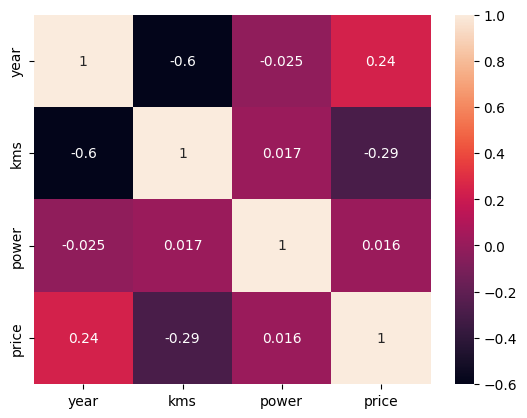

In [20]:
sns.heatmap(df.corr(method='pearson'),annot = True)
plt.show()

In [21]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
year     0.238717
power    0.016339
kms     -0.292433
Name: price, dtype: float64

según el análisis de correlación, parece que el año y los kilómetros tienen cierta influencia en el precio del producto, mientras que la potencia tiene una correlación muy débil con el precio.

## 2.3 Rellenar valores nulos

#### Tenemos que rellenar los valores vacios de forma que el modelo de predicción sea lo mas preciso posible

In [22]:
df.isnull().sum()

vehicle_type      0
make              0
model             0
version          55
fuel            547
year              0
kms             249
power            82
shift           458
price             0
currency          0
location          0
dtype: int64

la versión no la vamos a utilizar para el modelo de predicción.

### los valores a rellenar son:

* fuel     547 valores.
* kms      249 valores.
* power    82 valores.
* shift     458 valores.

In [23]:
df.describe(include="all")

,vehicle_type,make,model,version,fuel,year,kms,power,shift,price,currency,location
count,13749,13749,13749,13694,13202,13749.000000,1.350000e+04,13667.000000,13291,13749.000000,13749,13749
unique,1,66,748,8658,4,NaN,NaN,NaN,2,NaN,1,668
top,car,Citroen,C3,ZEN TCE 66KW (90CV),Diésel,NaN,NaN,NaN,manual,NaN,EUR,Madrid
freq,13749,2961,891,41,7688,NaN,NaN,NaN,9253,NaN,13749,1893
mean,NaN,NaN,NaN,NaN,NaN,2015.714743,9.742466e+04,174.690788,NaN,19581.132301,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5.419091,7.129775e+04,3084.369160,NaN,23633.132211,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1967.000000,0.000000e+00,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2014.000000,4.500000e+04,100.000000,NaN,8600.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2018.000000,8.700000e+04,121.000000,NaN,14999.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2019.000000,1.340000e+05,150.000000,NaN,23490.000000,NaN,NaN


#### Voy a agrupar el dataframe por marcas para hacer alguna visualizacion

In [24]:
df_marcas = df.groupby('make')
conteo_marcas = df['make'].value_counts()
top_marcas = conteo_marcas.nlargest(30) # las 30 marcas con más registros

In [25]:
media_precios_por_marca = df_marcas['price'].mean()


#### Grafica del precio medio de las 30 marcas con más registros.

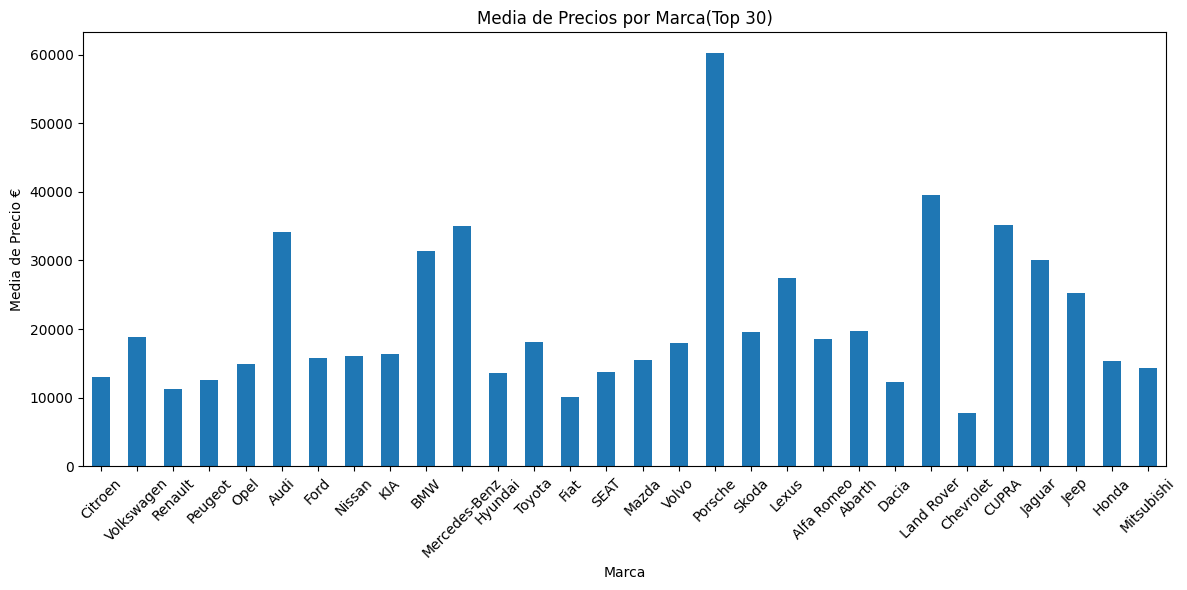

In [26]:
# Creamos la figura y los ejes 
fig, ax = plt.subplots(figsize=(12, 6))
media_precios_por_marca[top_marcas.index].plot(kind='bar', ax=ax)
#  títulos y etiquetas
ax.set_title('Media de Precios por Marca(Top 30)')
ax.set_xlabel('Marca')
ax.set_ylabel('Media de Precio €')
# Rotamos las etiquetas del eje x en 45 grados para mejorar la legibilidad
plt.xticks(rotation=45)
# Ajustar los márgenes para evitar que las etiquetas se superpongan
plt.tight_layout()
plt.show()


## 2.3.1 Rellenar los valores vacios de la columna "KM"

#### Para que el modelo sea lo más preciso posible, voy a rellenar los km , teniendo en cuenta el año del vehiculo,ya que son dos variables intimamente relacionadas. 

#### Calculamos la media de kilometros agrupando los vehiculos por año.

In [27]:
df_año = df.groupby('year')
media_km_dependiendo_año_vehiculo = df_año['kms'].mean() 


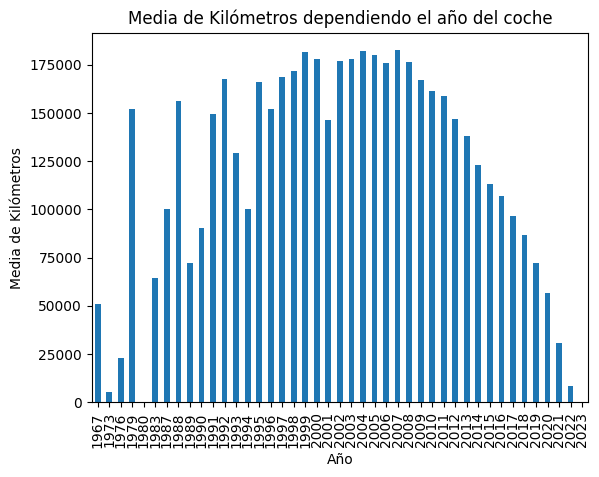

In [28]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar la media de kilómetros por año
media_km_dependiendo_año_vehiculo.plot(kind='bar', ax=ax)

# Configurar los títulos y etiquetas
ax.set_title('Media de Kilómetros dependiendo el año del coche')
ax.set_xlabel('Año')
ax.set_ylabel('Media de Kilómetros')

# Rotar las etiquetas del eje x en 45 grados para mejorar la legibilidad
plt.xticks(rotation=90)

plt.show()

In [29]:
df_kms_vacios = df[df['kms'].isnull()]  # creo un dataframe con los registros que tienen lo km vacíos
df_kms_vacios.shape

(249, 12)

In [30]:
df_kms_vacios.value_counts("year") # voy a mostrarlo por años 

year
2022    51
2019    20
2023    16
2017    16
2015    16
2018    15
2020    11
2004     9
2014     8
2010     8
2005     8
2008     7
2012     7
2007     7
2021     7
2009     6
2011     6
2016     6
2013     4
2002     4
2003     3
1999     3
2000     3
1998     2
2006     2
2001     2
1997     1
1995     1
dtype: int64

#### En el grafico podemos observar que la media para el año 1980 es cero, pero esto no nos va  a afectar a la hora de rellenar los valores vacíos, porque no hay ningún valor vacio del año 1980

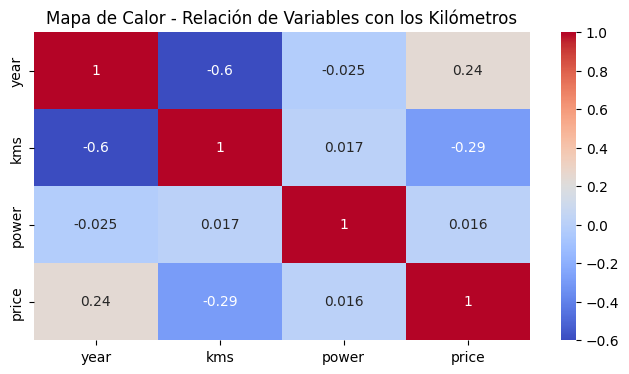

In [31]:
# Obtener la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar el título
plt.title('Mapa de Calor - Relación de Variables con los Kilómetros')

# Mostrar el mapa de calor
plt.show()

#### Tal y como pensaba, los kilometros se relacionan con el año del vehiculo.por tanto rellenamos los valores vacios con la media de kms dependiendo del año del vehiculo

#### Relleno los registros vacíos de la columna "kms",con la media de kilómetros dependiendo del año del vehículo

In [32]:
for index, row in df.iterrows():
    if pd.isnull(row['kms']):  # Compruebo si el valor de 'kms' está vacío
        year = row['year']  # Obtener el año del coche
        if year in media_km_dependiendo_año_vehiculo.index:
            media_km = media_km_dependiendo_año_vehiculo[year]  # Obtener la media de kms para el año
            
            df.loc[index, 'kms'] = media_km  # Rellenar el valor vacío con 
                                             #la media de kms correspondiente al año    

#### comprobamos si se ha rellenado correctamente comparando la media antes de rellenar los valores nulos y la media después

In [33]:
df.isnull().sum()

vehicle_type      0
make              0
model             0
version          55
fuel            547
year              0
kms               0
power            82
shift           458
price             0
currency          0
location          0
dtype: int64

#### Media por años después de rellenar los valores vacíos.

In [34]:
df_año_2 = df.groupby('year')
media_km__dependiendo_año_vehiculo_TEST = df_año['kms'].mean()

In [35]:
media_km_dependiendo_año_vehiculo==media_km__dependiendo_año_vehiculo_TEST


year
1967     True
1973     True
1976     True
1979     True
1980     True
1983     True
1987     True
1988     True
1989     True
1990     True
1991     True
1992     True
1993     True
1994     True
1995     True
1996     True
1997     True
1998     True
1999     True
2000     True
2001     True
2002     True
2003     True
2004     True
2005     True
2006     True
2007     True
2008     True
2009     True
2010     True
2011     True
2012     True
2013     True
2014     True
2015     True
2016     True
2017    False
2018     True
2019    False
2020     True
2021    False
2022     True
2023     True
Name: kms, dtype: bool

In [36]:
diferencia= media_km_dependiendo_año_vehiculo - media_km__dependiendo_año_vehiculo_TEST
diferencia

year
1967    0.000000e+00
1973    0.000000e+00
1976    0.000000e+00
1979    0.000000e+00
1980    0.000000e+00
1983    0.000000e+00
1987    0.000000e+00
1988    0.000000e+00
1989    0.000000e+00
1990    0.000000e+00
1991    0.000000e+00
1992    0.000000e+00
1993    0.000000e+00
1994    0.000000e+00
1995    0.000000e+00
1996    0.000000e+00
1997    0.000000e+00
1998    0.000000e+00
1999    0.000000e+00
2000    0.000000e+00
2001    0.000000e+00
2002    0.000000e+00
2003    0.000000e+00
2004    0.000000e+00
2005    0.000000e+00
2006    0.000000e+00
2007    0.000000e+00
2008    0.000000e+00
2009    0.000000e+00
2010    0.000000e+00
2011    0.000000e+00
2012    0.000000e+00
2013    0.000000e+00
2014    0.000000e+00
2015    0.000000e+00
2016    0.000000e+00
2017   -1.455192e-11
2018    0.000000e+00
2019   -1.455192e-11
2020    0.000000e+00
2021    3.637979e-12
2022    0.000000e+00
2023    0.000000e+00
Name: kms, dtype: float64

#### verificamos que se ha hecho bien porque los registros que dan una diferencia es minima.

## 2.3.2  Rellenar valores vacíos de "FUEL" Y "SHIFT".

#### voy a rellenar los valores vacios y "Otros" de "fuel" y "shift" con la moda

In [37]:
df['fuel'].unique()

array(['Gasolina', 'Diésel', 'Eléctrico', nan, 'Otros'], dtype=object)

In [38]:
df.value_counts("fuel")

fuel
Diésel       7688
Gasolina     4834
Eléctrico     600
Otros          80
dtype: int64

In [39]:
df['shift'].unique()

array(['manual', 'automatic', nan], dtype=object)

In [40]:
# Obtener la moda de la columna 'fuel'
moda_fuel = df['fuel'].mode()[0]

# Rellenar los valores vacíos y "Otros" con la moda
df['fuel'] = df['fuel'].fillna(moda_fuel )
df['fuel'] = df['fuel'].replace('Otros', moda_fuel )

In [41]:
moda_shift = df['shift'].mode()[0]

# Rellenar los valores vacíos con la moda
df['shift'] = df['shift'].fillna(moda_shift )

In [42]:
df.isnull().sum()

vehicle_type     0
make             0
model            0
version         55
fuel             0
year             0
kms              0
power           82
shift            0
price            0
currency         0
location         0
dtype: int64

## 2.3.3  Rellenar valores vacios de  "POWER".

#### Relleno la columna power con la potencia más repetida en todos los registros

In [43]:
df['power'].value_counts()

150.0    946
110.0    904
130.0    764
100.0    689
115.0    576
        ... 
740.0      1
527.0      1
244.0      1
523.0      1
341.0      1
Name: power, Length: 349, dtype: int64

In [44]:
moda_power = df['power'].mode()[0]

# Rellenar los valores vacíos con la moda
df['power'] = df['power'].fillna(moda_power)

In [45]:
df.isnull().sum()

vehicle_type     0
make             0
model            0
version         55
fuel             0
year             0
kms              0
power            0
shift            0
price            0
currency         0
location         0
dtype: int64

In [46]:
df_streamlit = df.copy()
df_streamlit.to_csv("df_streamlit.csv", index=False)    # hacemos una copia de este dataframe, que será el que usemos 
                                                        # para la App de Streamlit


In [47]:
df_streamlit.head()

,vehicle_type,make,model,version,fuel,year,kms,power,shift,price,currency,location
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,EUR,Pineda de Mar
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,EUR,Coslada
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,EUR,Madrid
3,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Sabadell
5,car,Opel,Crossland,1.2 GS LINE 110 CV 5P,Gasolina,2021,51390.0,110.0,manual,18200,EUR,Málaga


In [48]:
df_streamlit.shape

(13749, 12)

Antes de la trasnformación de los datos :

tras el análisis de los datos, vamos a eliminar la columna "currency" y "vehicle_type" ya que no nos aportará nada. En un principio tambien vamos a elimnar la version ya que puede alterar los resultados al haber demasiados registros únicos.

La decisión de eliminar la variable "Versión" del dataset se basa en su elevado número de registros únicos, lo que dificulta su análisis y modelado. Esta eliminación contribuye a simplificar el modelo y centrar el enfoque en variables más significativas para la predicción precisa del precio de los vehículos.

In [49]:
df.head()

,vehicle_type,make,model,version,fuel,year,kms,power,shift,price,currency,location
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,EUR,Pineda de Mar
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,EUR,Coslada
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,EUR,Madrid
3,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Sabadell
5,car,Opel,Crossland,1.2 GS LINE 110 CV 5P,Gasolina,2021,51390.0,110.0,manual,18200,EUR,Málaga


In [51]:
df = df. drop(["currency", "version","location",'vehicle_type'], axis=1)


KeyError: "['currency', 'version', 'location', 'vehicle_type'] not found in axis"

In [52]:
df.head()

,make,model,fuel,year,kms,power,shift,price
0,Opel,Crossland,Gasolina,2022,5.0,110.0,manual,22900
1,Opel,Crossland,Gasolina,2022,24847.0,110.0,manual,19990
2,Opel,Crossland,Diésel,2021,41356.0,120.0,automatic,18590
3,Opel,Crossland,Gasolina,2022,11.0,110.0,manual,22700
5,Opel,Crossland,Gasolina,2021,51390.0,110.0,manual,18200


# 3. TRANSFORMACION DE DATOS

## 3.1 Codificación de variables categoricas.

In [53]:
# Obtener el tipo de cada columna en el DataFrame
tipos_columnas = df.dtypes

# Imprimir el tipo de cada columna
print(tipos_columnas)

make      object
model     object
fuel      object
year       int64
kms      float64
power    float64
shift     object
price      int64
dtype: object


### En este caso tenemos 4 variables categoricas:
* make      object
* model     object
* fuel      object
* shift     object

### - Transformamos la columna "fuel" 

In [54]:
mapeo = {'Diésel': 1, 'Gasolina': 0, 'Eléctrico': 2} 
df['fuel_codificada'] =  df['fuel'].map(mapeo)

### - Transformamos la columna "shift" 

In [55]:
df["shift"].value_counts()

manual       9711
automatic    4038
Name: shift, dtype: int64

In [56]:
mapeo_shift = {'manual': 0, 'automatic': 1 }
df["shift_codificada"]=df["shift"].map(mapeo_shift)

### - Transformamos las columnas "make"y "model"

### La clave de este proyecto,es unir marca y modelo en una sola columna

La marca y el modelo son dos atributos clave que influyen significativamente en el precio de un vehículo. Combinarlos en un solo campo puede ayudar a capturar mejor esta información relevante y potencialmente mejorar el rendimiento del modelo de machine learning.

Al tener una gran cantidad de marcas y modelos únicos en mi conjunto de datos, al unir las columnas puedo reducir la dimensionalidad y simplificar el procesamiento de los datos.

#### Además,cada marca tiene sólo unos determinados modelos, al unirlos, estamos asignando a cada marca los modelos existentes de esa marca.Si no los unimos, nuestro modelo de machine learning trabajaría con combinaciones de marca y modelos que no existen y falsearía la predicción.



In [57]:
df['marca_modelo'] = df['make'] + ' ' + df['model']
df = df.drop(["make","model"],axis=1)

In [58]:
df["marca_modelo"].nunique()

763

#### Una vez que tenemos la columna Marca y modelo, la vamos a categorizar numericamente en función del precio. Se asignará el valor 1 a la marca y modelo más barata y el 763 a la más cara

#### Calculamos el precio promedio para cada modelo de vehículo y lo ordenamos de menor a mayor:


In [59]:
# Calculamos el precio promedio para cada marca y modelo de vehículo
df_precio_medio_marca_modelo = df.groupby('marca_modelo')['price'].mean().reset_index()
#reset_index() se utiliza para restablecer el índice del DataFrame resultante 

# Ordenamos el DataFrame por el precio promedio en orden ascendente
df_precio_medio_marca_modelo_sorted = df_precio_medio_marca_modelo.sort_values('price', ascending=True)
df_precio_medio_marca_modelo_sorted.head(4)


,marca_modelo,price
562,Opel Vectra,450.5
647,Skoda Enyaq iV,625.0
187,Daewoo Lanos,800.0
164,Citroen Saxo,825.0


In [60]:
df_precio_medio_marca_modelo_sorted.tail(4)


,marca_modelo,price
480,Mercedes-Benz SLR,299999.0
24,Aston Martin DBX,310000.0
377,Lamborghini Aventador,342000.0
205,Ferrari F8,398000.0


In [61]:
# Crear un diccionario que asigne valores numéricos basados en el orden de precios
precio_numerico_dict = {marca_modelo: i for i, marca_modelo in 
                        enumerate(df_precio_medio_marca_modelo_sorted['marca_modelo'], start=1)}

# Crear una nueva columna "marca_modelo_codificada" en el DataFrame y 
#asignar los valores numéricos utilizando el diccionario

df_precio_medio_marca_modelo_sorted['marca_modelo_codificada'] = df_precio_medio_marca_modelo_sorted \
                                                                 ['marca_modelo'].map(precio_numerico_dict)


# Imprimir el DataFrame resultante
print(df_precio_medio_marca_modelo_sorted)

              marca_modelo     price  marca_modelo_codificada
562            Opel Vectra     450.5                        1
647         Skoda Enyaq iV     625.0                        2
187           Daewoo Lanos     800.0                        3
164           Citroen Saxo     825.0                        4
5           Alfa Romeo 145     990.0                        5
..                     ...       ...                      ...
381       Lamborghini Urus  278062.5                      759
480      Mercedes-Benz SLR  299999.0                      760
24        Aston Martin DBX  310000.0                      761
377  Lamborghini Aventador  342000.0                      762
205             Ferrari F8  398000.0                      763

[763 rows x 3 columns]


#### * Guardo este diccionario porque me servirá para luego hacer la decodificación 

In [62]:
# Guardar el diccionario en un archivo
with open('precio_numerico_dict2.pkl', 'wb') as f:
    pickle.dump(precio_numerico_dict, f)

#### Unimos ambos dataframes por la columna marca_modelo

In [63]:
df = df.merge(df_precio_medio_marca_modelo_sorted[['marca_modelo', 'marca_modelo_codificada']]\
              , on='marca_modelo', how='left') 
df.sample(9)

,fuel,year,kms,power,shift,price,fuel_codificada,shift_codificada,marca_modelo,marca_modelo_codificada
3415,Gasolina,2020,55000.0,69.0,manual,308,0,0,Fiat 500,203
9843,Gasolina,2018,65835.0,125.0,manual,16990,0,0,Ford Focus,266
709,Gasolina,2009,105000.0,150.0,automatic,39999,0,1,Maserati GranTurismo,662
1389,Gasolina,2021,29476.0,125.0,manual,23575,0,0,Ford Puma,498
7709,Diésel,2007,270500.0,150.0,automatic,4299,1,1,Chrysler Voyager,82
11362,Diésel,2015,140000.0,150.0,manual,9900,1,0,Citroen C5,160
1334,Diésel,2017,98077.0,80.0,manual,8490,1,0,Fiat Fiorino,168
12921,Diésel,2019,43500.0,102.0,manual,24500,1,0,Citroen Berlingo,378
9300,Diésel,2017,46325.0,75.0,manual,13500,1,0,Peugeot Partner,270


#### Finalmente he codificado la columna marca modelo en función del precio promedio 

In [64]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                      1.000000
marca_modelo_codificada    0.623769
shift_codificada           0.438908
year                       0.238717
power                      0.016164
fuel_codificada           -0.029244
kms                       -0.292687
Name: price, dtype: float64

In [65]:
df.head(9)

,fuel,year,kms,power,shift,price,fuel_codificada,shift_codificada,marca_modelo,marca_modelo_codificada
0,Gasolina,2022,5.000000,110.0,manual,22900,0,0,Opel Crossland,427
1,Gasolina,2022,24847.000000,110.0,manual,19990,0,0,Opel Crossland,427
2,Diésel,2021,41356.000000,120.0,automatic,18590,1,1,Opel Crossland,427
3,Gasolina,2022,11.000000,110.0,manual,22700,0,0,Opel Crossland,427
4,Gasolina,2021,51390.000000,110.0,manual,18200,0,0,Opel Crossland,427
5,Gasolina,2021,30536.000000,110.0,manual,17100,0,0,Opel Crossland,427
6,Gasolina,2022,8431.816296,131.0,manual,24870,0,0,Opel Crossland,427
7,Gasolina,2022,8431.816296,110.0,manual,21225,0,0,Opel Crossland,427
8,Gasolina,2022,10.000000,130.0,manual,23800,0,0,Opel Crossland,427


## 3.2 Feature Engineering (creación de la columna antigüedad)

para obtener una representación más adecuada de los datos,en lugar de utilizar el año directamente, convertirlo a años de antigüedad permitirá que el modelo de machine learning capture mejor la relación entre la antigüedad y el precio del vehículo

In [66]:

current_year = datetime.datetime.now().year
df["years_old"]= current_year -df["year"]
df.head(3)

,fuel,year,kms,power,shift,price,fuel_codificada,shift_codificada,marca_modelo,marca_modelo_codificada,years_old
0,Gasolina,2022,5.0,110.0,manual,22900,0,0,Opel Crossland,427,1
1,Gasolina,2022,24847.0,110.0,manual,19990,0,0,Opel Crossland,427,1
2,Diésel,2021,41356.0,120.0,automatic,18590,1,1,Opel Crossland,427,2


#### Obtenemos nuestro dataframe sobre el que vamos a realizar los modelos de ML

In [67]:
nuevo_df = df[["price", "marca_modelo_codificada","kms", "shift_codificada", "power", "fuel_codificada", "years_old"]].copy()
df["power"]=df["power"].astype(int)
print(df["power"].dtype)
nuevo_df.head()

int32


,price,marca_modelo_codificada,kms,shift_codificada,power,fuel_codificada,years_old
0,22900,427,5.0,0,110.0,0,1
1,19990,427,24847.0,0,110.0,0,1
2,18590,427,41356.0,1,120.0,1,2
3,22700,427,11.0,0,110.0,0,1
4,18200,427,51390.0,0,110.0,0,2


In [ ]:
#nuevo_df.to_csv('nuevo_df2.csv', index=False) # lo guardamos en un archivo csv


## 3.3 Identificación valores atípicos

Antes de empezar a trabajar con los cmodelos de prediccion voy a mostrar unos graficos de dispersión para detectar si hay algún valor atípico que pudiera falsear los datos de mi prediccion. 

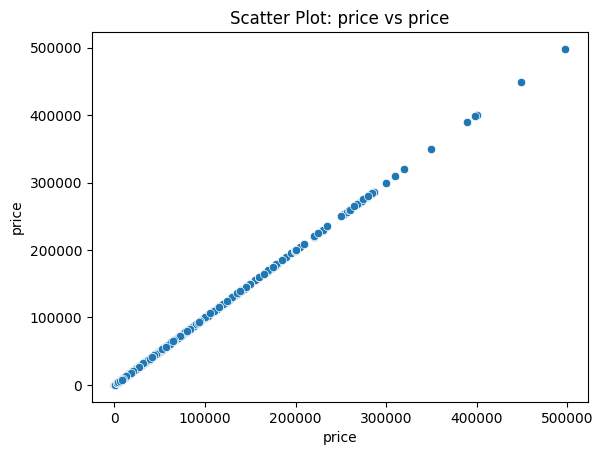

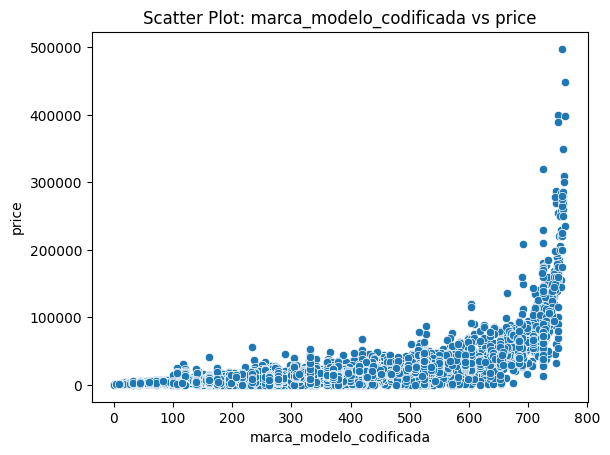

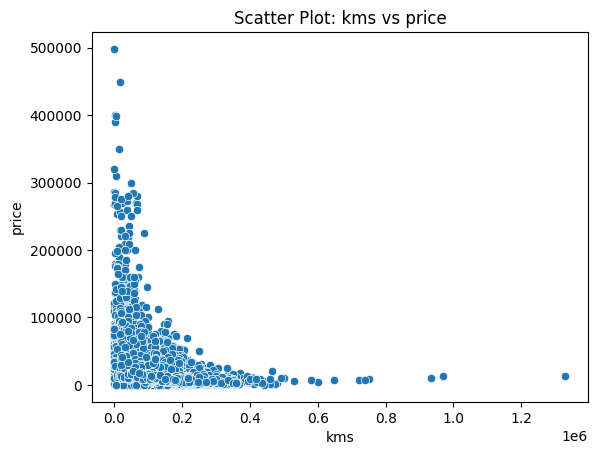

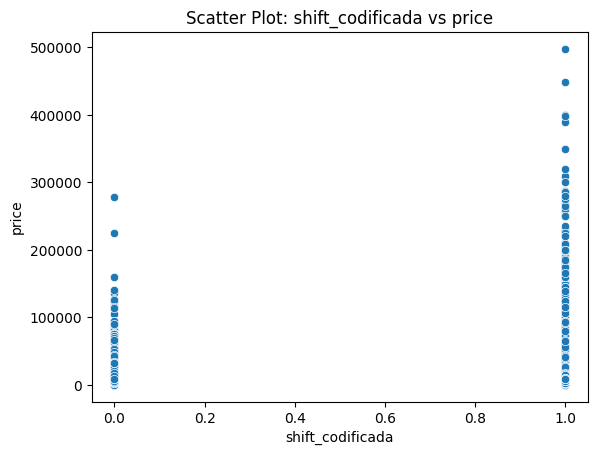

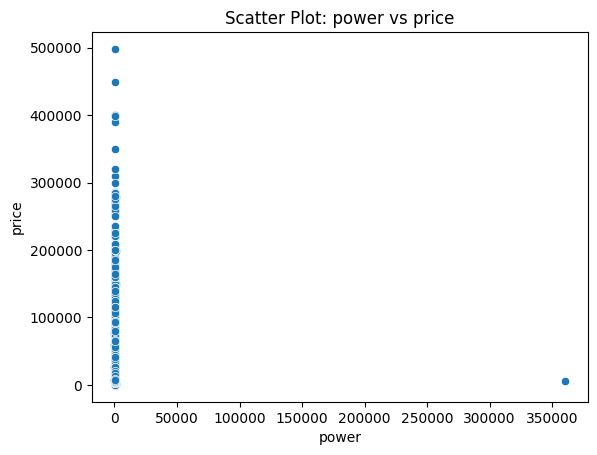

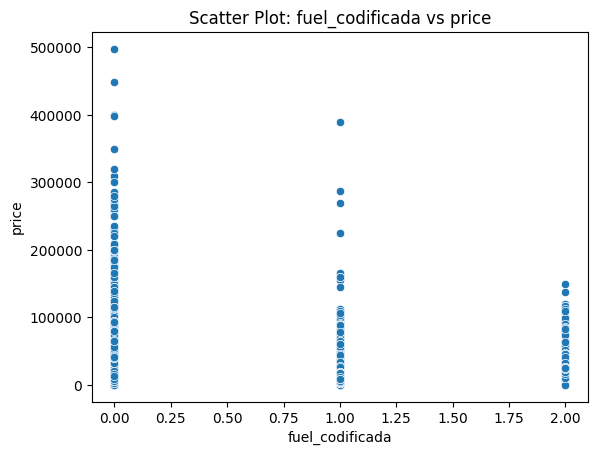

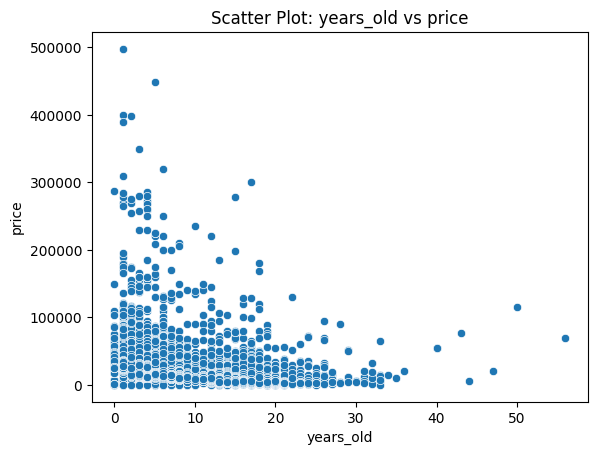

In [68]:
for column in nuevo_df.columns:
    sns.scatterplot(data=nuevo_df, x=column, y="price")
    plt.xlabel(column)
    plt.ylabel("price")
    plt.title(f"Scatter Plot: {column} vs price")
    plt.show()

#### la grafica de "power" vamos a volver a hacerla incluyendole una escala .

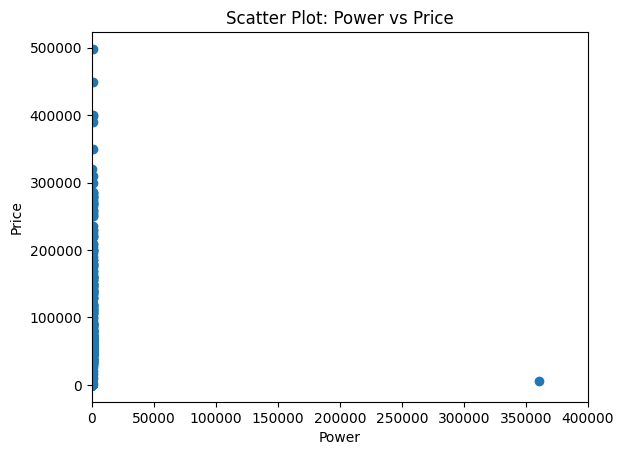

In [69]:
plt.scatter(nuevo_df["power"], nuevo_df["price"])

plt.xlabel("Power")
plt.ylabel("Price")
plt.title("Scatter Plot: Power vs Price")
# Ajustar la escala del eje x
plt.xlim(0, 400000)


plt.show()

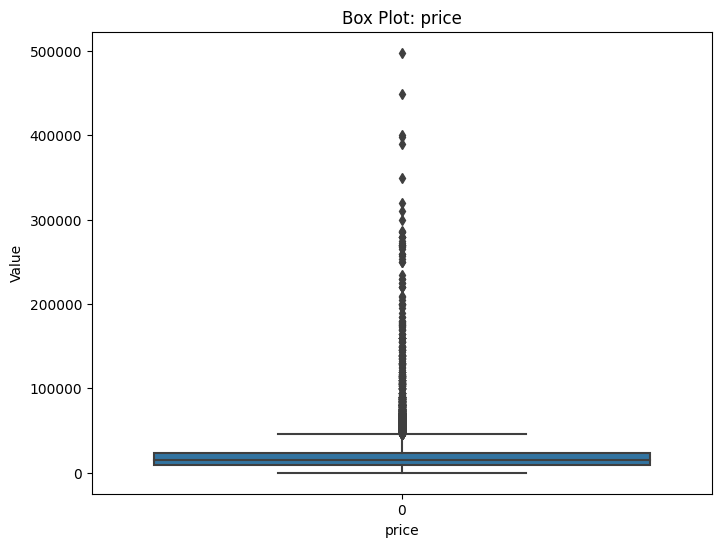

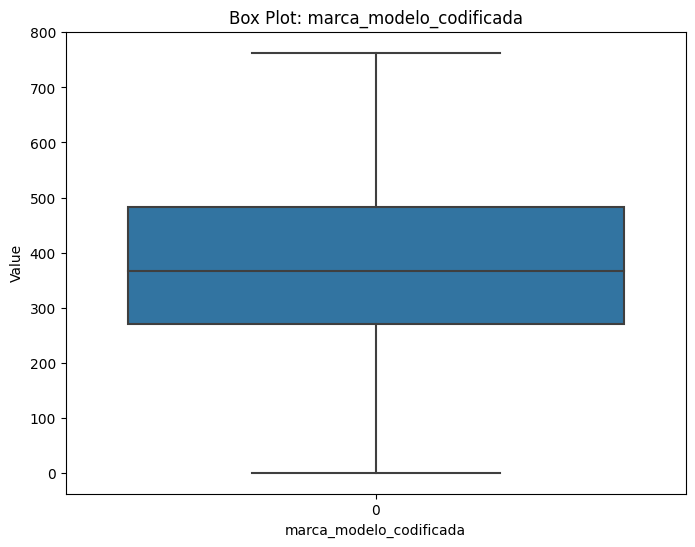

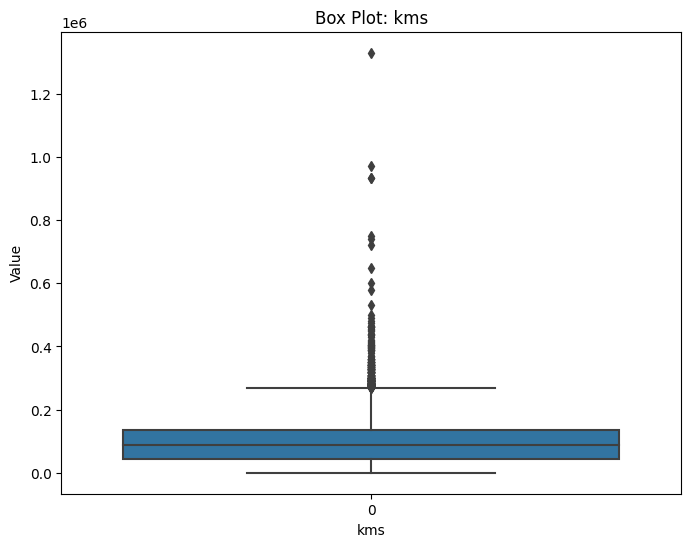

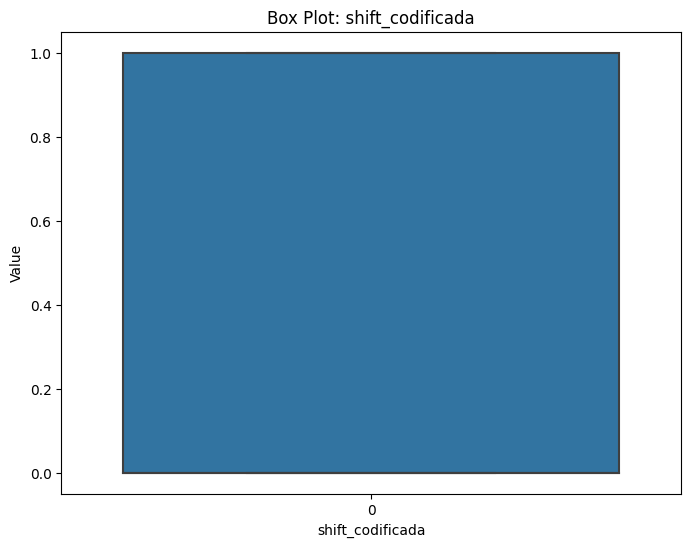

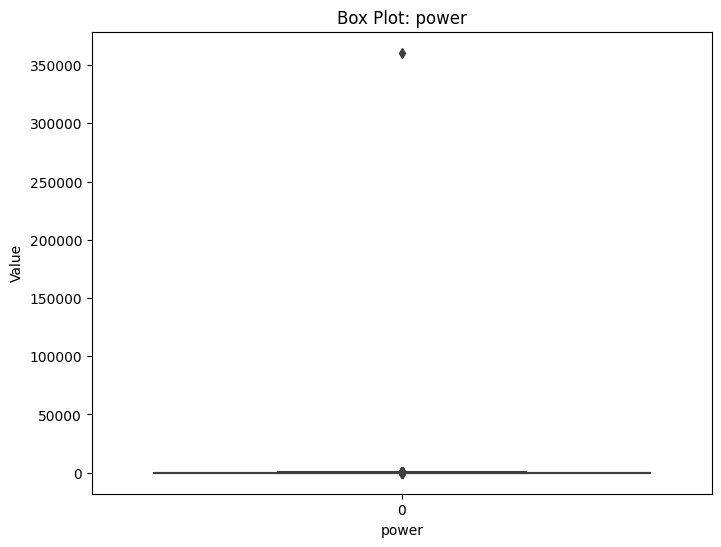

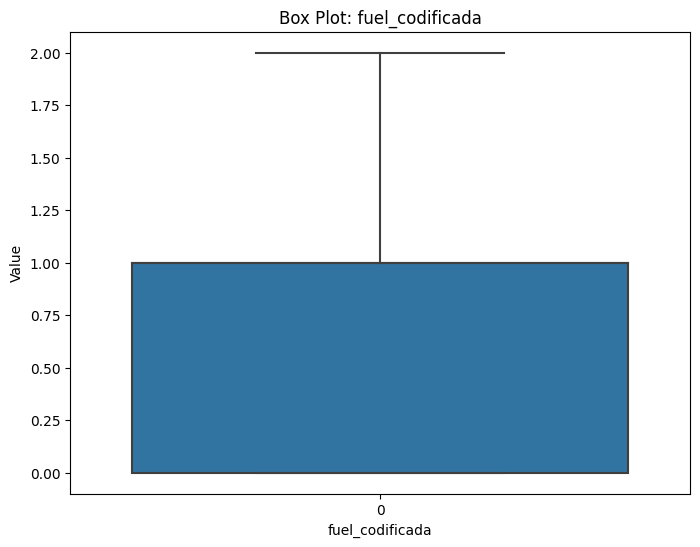

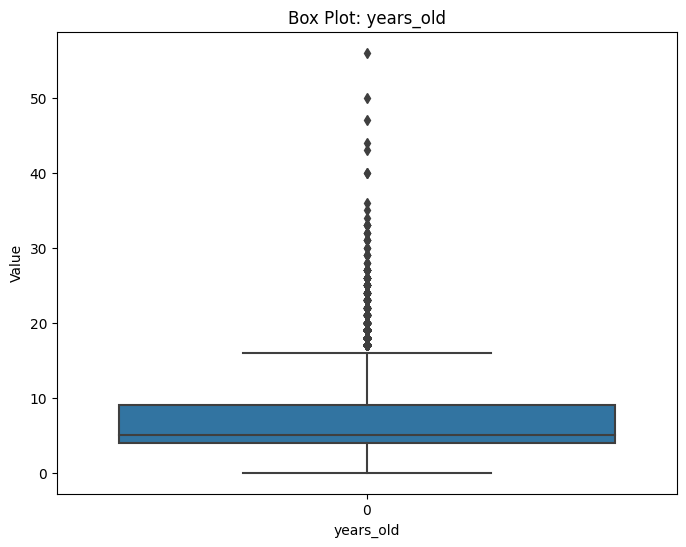

In [70]:
for column in nuevo_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=nuevo_df[column])
    plt.xlabel(column)
    plt.ylabel("Value")
    plt.title(f"Box Plot: {column}")
    plt.show()


In [71]:
# Establecer los rangos y valores mínimos en las columnas correspondientes eliminando valores atípicos
power_min = 50
power_max = 1000
year_max = 27
price_min = 1000

# Filtrar los registros que cumplan con las tres condiciones
nuevo_df = nuevo_df[(nuevo_df["power"] >= power_min) & (nuevo_df["power"] <= power_max) &
                    (nuevo_df["years_old"] < year_max ) & (nuevo_df["price"] >= price_min)]

nuevo_df.shape


(12565, 7)

In [72]:
nuevo_df.head(3)

,price,marca_modelo_codificada,kms,shift_codificada,power,fuel_codificada,years_old
0,22900,427,5.0,0,110.0,0,1
1,19990,427,24847.0,0,110.0,0,1
2,18590,427,41356.0,1,120.0,1,2


se ha detectado un valor atipico en la columna de Power

# 4. MODELOS DE MACHINE LEARNIG

## 4.1 División de datos en conjuntos de entrenamiento y prueba 

#### Establecemos "X"e "y"

In [73]:
X = nuevo_df.drop("price", axis=1)
y = nuevo_df["price"]

In [74]:
X.head(4)

,marca_modelo_codificada,kms,shift_codificada,power,fuel_codificada,years_old
0,427,5.0,0,110.0,0,1
1,427,24847.0,0,110.0,0,1
2,427,41356.0,1,120.0,1,2
3,427,11.0,0,110.0,0,1


#### Vamos a realizar el entrenamiento dividiendo los datos en entrenamiento y ensayo (80%-20%) y probamos algunos modelos de regresión

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## 4.2  Prueba de modelos de Machine Learning

### - Regresión Lineal

In [76]:
modelo_LG = LinearRegression()

# Entreno el modelo utilizando el conjunto de entrenamiento
modelo_LG.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = modelo_LG.predict(X_test)

r2_RL = r2_score(y_test, y_pred)
print("Coeficiente de determinación R2:", r2_RL)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)



Coeficiente de determinación R2: 0.6294519302453286
Mean Squared Error (MSE): 192828466.7083741


### - Ramdon Forest Regression

In [77]:
modelo_RF = RandomForestRegressor(random_state=42)
modelo_RF.fit(X_train, y_train)
y_pred = modelo_RF.predict(X_test)

r2_RF = r2_score(y_test, y_pred)
print("Coeficiente de determinación R2:", r2_RF)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Coeficiente de determinación R2: 0.8852850519349397
Mean Squared Error (MSE): 59696188.83337198


### - K-Nearest Neighbors

In [78]:
modelo_KN = KNeighborsRegressor(n_neighbors=5)
modelo_KN.fit(X_train, y_train)
y_pred = modelo_KN.predict(X_test)

r2_KN = r2_score(y_test, y_pred)
print("Coeficiente de determinación R2:", r2_KN)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Coeficiente de determinación R2: 0.6000557120582963
Mean Squared Error (MSE): 208125881.9230402


### - Decision Tree Regression


In [79]:
modelo_DT = DecisionTreeRegressor(random_state=42)
modelo_DT.fit(X_train, y_train)
y_pred_arbol = modelo_DT.predict(X_test)

r2_arbol = r2_score(y_test, y_pred_arbol)
print("Coeficiente de determinación R2 (Árboles de Decisión):", r2_arbol)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Coeficiente de determinación R2 (Árboles de Decisión): 0.8307175076249836
Mean Squared Error (MSE): 208125881.9230402


## 4.3 Selección del modelo

#### Viendo los resultados , nos quedaremos con el modelo de Ramdom Forest Regresion

#### Guardamos la prediccion de modelo Ramdom Forest en un archivo "pkl"

In [80]:
with open('modelo.pkl2', 'wb') as f:
    pickle.dump(modelo_RF, f)

In [82]:
nuevos_datos = pd.DataFrame({
    'marca_modelo_codificada': [446],
    'kms': [50000],
    'shift_codificada': [0],
    'power': [110.0],
    'fuel_codificada': [0],
    'years_old': [5]
})

# Realizar predicciones utilizando el modelo cargado
predicciones = modelo_RF.predict(nuevos_datos)

# Imprimir las predicciones
print("Predicciones del precio:", predicciones)

Predicciones del precio: [16995.63666667]


In [ ]:
df.head()

## df streamlit

In [83]:
df_streamlit

,vehicle_type,make,model,version,fuel,year,kms,power,shift,price,currency,location
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,EUR,Pineda de Mar
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,EUR,Coslada
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,EUR,Madrid
3,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Sabadell
5,car,Opel,Crossland,1.2 GS LINE 110 CV 5P,Gasolina,2021,51390.0,110.0,manual,18200,EUR,Málaga
...,...,...,...,...,...,...,...,...,...,...,...,...
99931,car,Citroen,C4 Picasso,BlueHDi 88KW (120CV) Feel,Diésel,2017,71330.0,120.0,manual,18200,EUR,Espinardo
99947,car,Citroen,C4 Picasso,BlueHDi 150cv Exclusive,Diésel,2014,109350.0,150.0,manual,11690,EUR,Ourense
99948,car,Citroen,C4 Picasso,PureTech SS 6v Live,Gasolina,2017,108697.0,130.0,manual,13199,EUR,Madrid
99996,car,Citroen,C4 Picasso,Seduction,Diésel,2013,173035.0,111.0,automatic,9290,EUR,Valencia


In [84]:
power_min = 50
power_max = 1000
year_min = 1996
price_min = 1000

# Filtrar los registros que cumplan con las tres condiciones
df_streamlit = df_streamlit[(df_streamlit["power"] >= power_min) & (df_streamlit["power"] <= power_max) &
                    (df_streamlit["year"] > year_min ) & (df_streamlit["price"] >= price_min)]

df_streamlit.shape

(12565, 12)

In [85]:
df_streamlit.head()


,vehicle_type,make,model,version,fuel,year,kms,power,shift,price,currency,location
0,car,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,EUR,Pineda de Mar
1,car,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,EUR,Coslada
2,car,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,EUR,Madrid
3,car,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Sabadell
5,car,Opel,Crossland,1.2 GS LINE 110 CV 5P,Gasolina,2021,51390.0,110.0,manual,18200,EUR,Málaga


In [86]:
df_streamlit = df_streamlit.drop(["vehicle_type"],axis=1)

In [87]:
df_streamlit.head()


,make,model,version,fuel,year,kms,power,shift,price,currency,location
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,EUR,Pineda de Mar
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,EUR,Coslada
2,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,EUR,Madrid
3,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Sabadell
5,Opel,Crossland,1.2 GS LINE 110 CV 5P,Gasolina,2021,51390.0,110.0,manual,18200,EUR,Málaga


In [88]:
valores_vacios = df_streamlit.isna().sum()
valores_vacios

make         0
model        0
version     54
fuel         0
year         0
kms          0
power        0
shift        0
price        0
currency     0
location     0
dtype: int64

In [89]:
ubicaciones_unicas = df_streamlit['location'].unique()
len(ubicaciones_unicas)


664

### vamos a calcular la latitud y longitud de cada ubicación para luego usarlas en nuestra App

In [90]:
import geopy.geocoders as geocoders

geolocator = geocoders.Nominatim(user_agent='my_app')

coordenadas = []

for ubicacion in ubicaciones_unicas:
    try:
        location = geolocator.geocode(ubicacion)
        if location is not None:
            lat = location.latitude
            lon = location.longitude
            coordenadas.append((ubicacion, lat, lon))
        else:
            coordenadas.append((ubicacion, None, None))
    except:
        coordenadas.append((ubicacion, None, None))
len(coordenadas)
# Imprimir las coordenadas obtenidas
#for ubicacion, lat, lon in coordenadas:
#    print(f'Ubicación: {ubicacion}, Latitud: {lat}, Longitud: {lon}')

664

### Creamos un dataframe con las coordenadas unicas

In [91]:
df_coordenadas = pd.DataFrame(coordenadas, columns=['location','latitude', 'longitude'])
df_coordenadas.head()

,location,latitude,longitude
0,Pineda de Mar,41.627681,2.689871
1,Coslada,40.423802,-3.555288
2,Madrid,40.416705,-3.703582
3,Sabadell,41.510280,2.112326
4,Málaga,36.721303,-4.421637


### Vamos a añadir cada coodenada a la ubicación de nuestro dataframe

In [93]:
coordenadas_dict = df_coordenadas.set_index('location').to_dict(orient='index')


In [94]:
df_streamlit['latitude'] = df_streamlit['location'].map(lambda x: coordenadas_dict.get(x, {}).get('latitude'))
df_streamlit['longitude'] = df_streamlit['location'].map(lambda x: coordenadas_dict.get(x, {}).get('longitude'))

In [95]:
df_streamlit.head()

,make,model,version,fuel,year,kms,power,shift,price,currency,location,latitude,longitude
0,Opel,Crossland,1.2 GAS 110 GS Line 5p S/S,Gasolina,2022,5.0,110.0,manual,22900,EUR,Pineda de Mar,41.627681,2.689871
1,Opel,Crossland,1.2 81kW (110CV) GS Line,Gasolina,2022,24847.0,110.0,manual,19990,EUR,Coslada,40.423802,-3.555288
2,Opel,Crossland,1.5D 88kW (120CV) Business Elegance Auto,Diésel,2021,41356.0,120.0,automatic,18590,EUR,Madrid,40.416705,-3.703582
3,Opel,Crossland,GS-Line 1.2 GAS MT6 S/S 110cv,Gasolina,2022,11.0,110.0,manual,22700,EUR,Sabadell,41.510280,2.112326
5,Opel,Crossland,1.2 GS LINE 110 CV 5P,Gasolina,2021,51390.0,110.0,manual,18200,EUR,Málaga,36.721303,-4.421637


In [96]:
df_streamlit.shape

(12565, 13)

In [97]:
df_streamlit.to_csv("df_streamlit.csv", index=False)